In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('case_study_data.csv')

# Clean the Data

### Missing Data

In [3]:
df.describe()

,search_date,arrival,departure,num_adults,num_children,search_id,hotel_id,hotel_price,is_promo,hotel_feature_1,hotel_feature_2,hotel_feature_3,hotel_feature_4,hotel_feature_5,booked
count,46647.000000,46647.000000,46647.000000,46647.000000,46647.000000,46647.000000,46647.000000,46647.000000,46647.000000,45445.000000,46322.000000,46647.000000,46647.000000,46647.000000,46647.000000
mean,11.734517,126.788046,134.479902,2.370570,0.812335,5509.648659,23095.564302,2599.055621,0.501490,76.849742,63.108847,59.068729,5.982335,2.357601,0.006603
std,7.336887,90.867556,92.517336,0.912667,0.949223,4460.689701,13480.392766,4490.091588,0.500003,41.747830,22.846125,51.378153,6.014773,1.811249,0.080990
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.370000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,49.000000,54.000000,2.000000,0.000000,1656.000000,11474.000000,559.400000,0.000000,46.238512,52.000000,16.000000,1.000000,1.000000,0.000000
50%,12.000000,109.000000,116.000000,2.000000,0.000000,4488.000000,23309.000000,1336.600000,1.000000,67.712628,52.000000,46.000000,4.000000,1.000000,0.000000
75%,17.000000,187.000000,197.000000,3.000000,2.000000,8727.000000,33668.000000,3090.510000,1.000000,128.117134,90.000000,86.000000,9.000000,4.000000,0.000000
max,25.000000,493.000000,501.000000,8.000000,6.000000,16015.000000,46647.000000,175454.410000,1.000000,143.777606,100.000000,287.000000,36.000000,7.000000,1.000000


We can see from the count of each column that 'hotel_feature_1' and 'hotel_feature_2' are missing values

In [4]:
print "Number of missing hotel_feature_1 entries: " + str(len(df[np.isnan(df['hotel_feature_1'])]))
print "Number of missing hotel_feature_2 entries: " + str(len(df[np.isnan(df['hotel_feature_2'])]))

Number of missing hotel_feature_1 entries: 1202
Number of missing hotel_feature_2 entries: 325


In [5]:
df.reset_index('hotel_id').head()

,index,search_date,arrival,departure,num_adults,num_children,search_id,hotel_id,hotel_price,is_promo,hotel_feature_1,hotel_feature_2,hotel_feature_3,hotel_feature_4,hotel_feature_5,booked
0,0,25,457,471,3,2,0,517,1724.38,0,64.490309,85.0,7,0,0,0
1,1,25,457,471,3,2,0,517,1724.38,0,64.490309,85.0,7,0,0,0
2,2,25,457,471,3,2,0,29771,1905.54,1,25.826343,52.0,13,1,1,0
3,3,25,458,463,2,0,1,517,2077.95,0,64.490309,85.0,9,0,0,0
4,4,25,458,463,2,0,1,40744,6822.10,0,24.959968,52.0,11,1,2,0


#### Hotel Feature 1

Check to see if all unique 'hotel_id' rows are paired with the same unique 'hotel_feature_1' e.g. hotel_id=517 will always have hotel_feature_1=64.490309 etc.

In [6]:
df_nonan_feature1 = df[np.isnan(df['hotel_feature_1']) != True]
hotel_id_feature1_pairs_count = df_nonan_feature1.groupby('hotel_id').agg({'hotel_feature_1': pd.Series.nunique})
max(hotel_id_feature1_pairs_count['hotel_feature_1'])

1.0

Since we can see that they are paired, we can replace missing values of hotel_feature_1 with a value based on their 'hotel_id'

In [7]:
hotel_id_feature1_pairs = df_nonan_feature1.groupby('hotel_id').agg({'hotel_feature_1':'first'})

In [8]:
hotel_id_feature1_pairs.reset_index('hotel_id').head()

,hotel_id,hotel_feature_1
0,1,63.725976
1,116,75.379042
2,175,52.820451
3,297,128.856509
4,443,120.440857


Now we have a series of pairs of 'hotel_id' to 'hotel_feature_1' we can insert the missing information into the series

In [9]:
hotel_id_feature1_pairs.loc[116]['hotel_feature_1'].item()

75.3790421802

In [10]:
def get_hotel_feature_1(hotel_id):
    return hotel_id_feature1_pairs.loc[hotel_id]['hotel_feature_1'].item()


#df.apply(lambda row: hotel_id_feature1_pairs.loc[row['hotel_id']]['hotel_feature_1'].item())
replace_nan_with_hotel_feature_1(116, hotel_id_feature1_pairs)

NameError: name 'replace_nan_with_hotel_feature_1' is not defined

In [11]:
df['hotel_id'][0]

517

# ** I Can't Figure Out How To Do This So I'm Deleting The Rows

In [12]:
df = df[np.isnan(df['hotel_feature_1']) != True]
df = df[np.isnan(df['hotel_feature_2']) != True]

In [13]:
df.head()

,search_date,arrival,departure,num_adults,num_children,search_id,hotel_id,hotel_price,is_promo,hotel_feature_1,hotel_feature_2,hotel_feature_3,hotel_feature_4,hotel_feature_5,booked
0,25,457,471,3,2,0,517,1724.38,0,64.490309,85.0,7,0,0,0
1,25,457,471,3,2,0,517,1724.38,0,64.490309,85.0,7,0,0,0
2,25,457,471,3,2,0,29771,1905.54,1,25.826343,52.0,13,1,1,0
3,25,458,463,2,0,1,517,2077.95,0,64.490309,85.0,9,0,0,0
4,25,458,463,2,0,1,40744,6822.10,0,24.959968,52.0,11,1,2,0


In [14]:
print "Number of missing hotel_feature_1 entries: " + str(len(df[np.isnan(df['hotel_feature_1'])]))
print "Number of missing hotel_feature_2 entries: " + str(len(df[np.isnan(df['hotel_feature_2'])]))

Number of missing hotel_feature_1 entries: 0
Number of missing hotel_feature_2 entries: 0


*** Continue Cleaning By Checking The Range of the Numbers and Stating Assumptions e.g.
- if the arrival date reads 457 then that is a book for next year

# New Columns

In [15]:
df['stay_length'] = df['departure'] - df['arrival']

In [16]:
df['price_per_night'] = df['hotel_price'] / df['stay_length']

In [17]:
df.round({'price_per_night': 2}).head()

,search_date,arrival,departure,num_adults,num_children,search_id,hotel_id,hotel_price,is_promo,hotel_feature_1,hotel_feature_2,hotel_feature_3,hotel_feature_4,hotel_feature_5,booked,stay_length,price_per_night
0,25,457,471,3,2,0,517,1724.38,0,64.490309,85.0,7,0,0,0,14,123.17
1,25,457,471,3,2,0,517,1724.38,0,64.490309,85.0,7,0,0,0,14,123.17
2,25,457,471,3,2,0,29771,1905.54,1,25.826343,52.0,13,1,1,0,14,136.11
3,25,458,463,2,0,1,517,2077.95,0,64.490309,85.0,9,0,0,0,5,415.59
4,25,458,463,2,0,1,40744,6822.10,0,24.959968,52.0,11,1,2,0,5,1364.42


# Plotting The Data

In [35]:
import seaborn as sb
%matplotlib inline

#### Arrival and Departure Dates

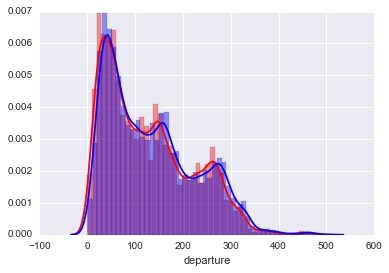

In [44]:
fig, ax = plt.subplots()
sb.distplot(df['arrival'], ax=ax, color='r')
sb.distplot(df['departure'], ax=ax, color='b')

#### Search Dates

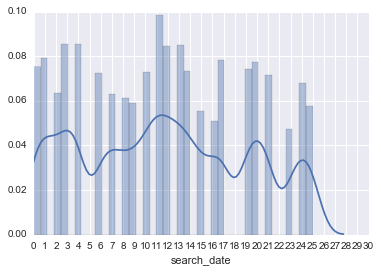

In [52]:
plt.xlim(0, 30)
plt.xticks(np.arange(0, 31, 1.0))
sb.distplot(df['search_date'])

#### Number of Adults and Children

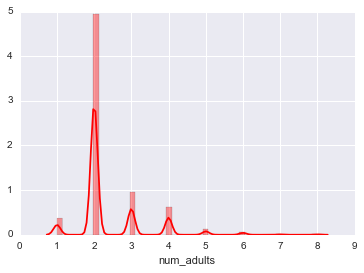

In [53]:
sb.distplot(df['num_adults'], color='r')

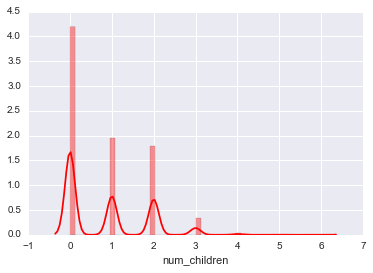

In [54]:
sb.distplot(df['num_children'], color='r')

#### Number of Hotels

In [55]:
print "The number of hotels in our dataset is " + str(len(df['hotel_id'].unique()))

The number of hotels in our dataset is 343


#### Ratio of Promo

In [59]:
num_promo = len(df[df['is_promo'] == 1])
total_searches = len(df)
print "The ratio of on promo of the dataset is " + str(round((num_promo / float(total_searches)), 2))

The ratio of on promo of the dataset is 0.51


### Hotel Features

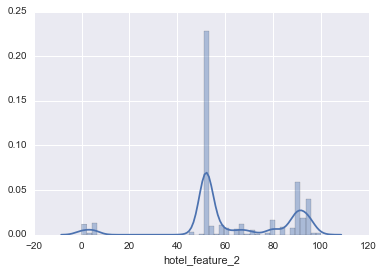

In [68]:
sb.distplot(df['hotel_feature_2'])

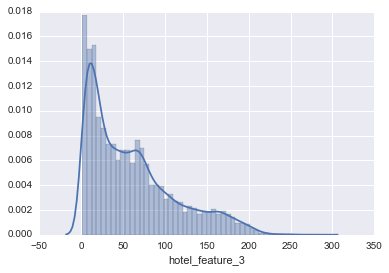

In [62]:
sb.distplot(df['hotel_feature_3'])

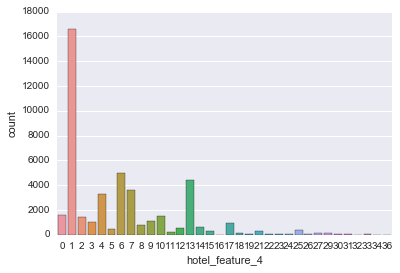

In [65]:
sb.countplot(x="hotel_feature_4", data=df)

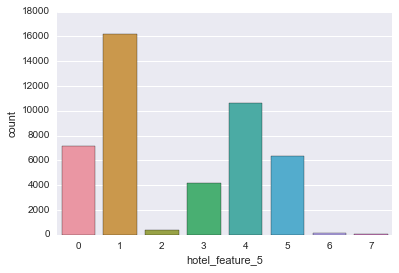

In [66]:
sb.countplot(x="hotel_feature_5", data=df)

# Correlations Between Columns

### Correlation Matrix

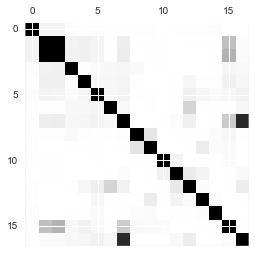

In [72]:
plt.matshow(df.corr(), interpolation='none', vmin=0, vmax=1)

### Correlations I Will Explore

I think the following correlations would be interesting to explore:
- price_per_night -> hotel_feature_1
- price_per_night -> hotel_feature_2
- price_per_night -> hotel_feature_3
- price_per_night -> hotel_feature_4
- price_per_night -> hotel_feature_5
- number_of_searches -> booked ** Not Done Yet **
- is_promo -> booked ** Not Done Yet **
- price_per_night -> booked ** Not Done Yet **
- number_children -> hotel_feature_1
- number_children -> hotel_feature_2
- number_children -> hotel_feature_3
- number_children -> hotel_feature_4
- number_children -> hotel_feature_5
- (arrival-search_date) -> price_per_night ** Not Done Yet **
- (arrival-seach_date) -> number_of children ** Not Done Yet **

In [1]:
corr_pairs = [['price_per_night', 'hotel_feature_1'], 
              ['price_per_night', 'hotel_feature_2'], 
              ['price_per_night', 'hotel_feature_3'], 
              ['price_per_night', 'hotel_feature_4'],
              ['price_per_night', 'hotel_feature_5'],
              ['num_children', 'hotel_feature_1'],
              ['num_children', 'hotel_feature_2'],
              ['num_children', 'hotel_feature_3'],
              ['num_children', 'hotel_feature_4'],
              ['num_children', 'hotel_feature_5'],
              ['num_adults', 'hotel_feature_1'],
              ['num_adults', 'hotel_feature_2'],
              ['num_adults', 'hotel_feature_3'],
              ['num_adults', 'hotel_feature_4'],
              ['num_adults', 'hotel_feature_5'],
             ]

In [2]:
for pair in corr_pairs:
    print "The correlation for " + pair[0] + " & " + pair[1] + " is: "
    print str(pearsonr(df[pair[0]], df[pair[1]]))
    print ""

The correlation for price_per_night & hotel_feature_1 is: 


NameError: name 'pearsonr' is not defined

### Discussing These Correlations (or lack of)